In [1]:
# Import the Riak client
from riak import RiakClient

# Instantiate the client with transport_options set to convert from Epoch to dates
client = RiakClient(transport_options={'ts_convert_timestamp': True})

In [2]:
# SQL Query asks for all records for the month of September 2014
query = """
SELECT start_date, duration, bike_no FROM Bike_Share_Trip WHERE 
    start_date > '2014-09-01 00:00:00' AND 
    start_date < '2014-09-30 23:59:59';
"""

# Use ts_query to execute our query and load the result set into ds
ds = client.ts_query('Bike_Share_Trip', query)

In [3]:
# Import the Pandas library
import pandas as pd

# Convert our result set into a Pandas data frame
df = pd.DataFrame(ds.rows)

# Set our dataframe's column names manually
df.columns = ['Date','Duration','Bike']

# Make a copy of our dataframe for the first example
df_example_one = df.copy()

In [4]:
# Convert our dates to simply have the date (remove the time portion) using
# the Pandas .dt.date function
df_example_one['Date'] = df_example_one['Date'].dt.date

Text(0.5,0,'Date')

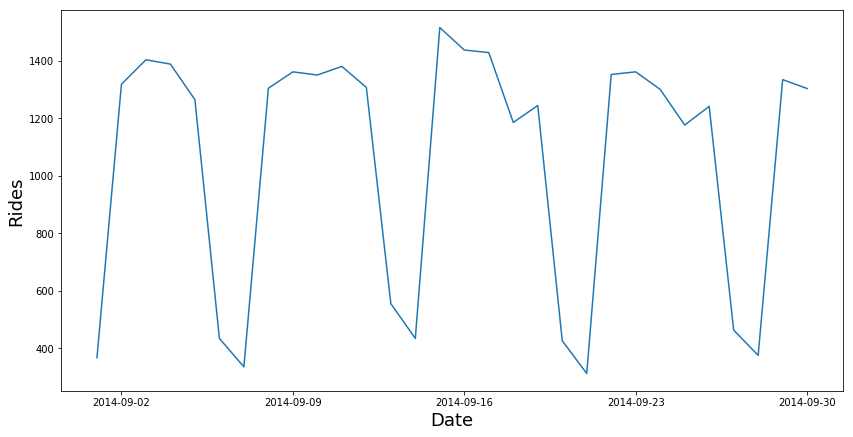

In [5]:
# Import matplotlib so that we generate visualizations of our data
import matplotlib as plt

# Set the matplotlib library to run inline in Jupyter
%matplotlib inline

# Count the number of records per date (value_counts) and plot the
# result as number of rides per day
ax = df_example_one['Date'].value_counts().plot(figsize=(14,7))
ax.set_ylabel('Rides', fontsize=18)
ax.set_xlabel('Date', fontsize=18)

In [6]:
# Make a copy of our dataframe for the second example
df_example_two = df.copy()

Text(0.5,0,'Day of Week')

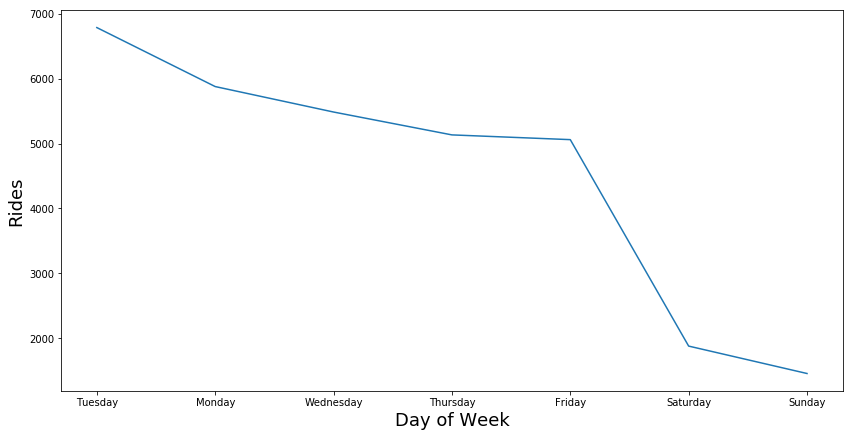

In [7]:
# Convert the date to the day of week (e.g, Monday, Tuesday, ...)
# using the Pandas .dt.weekday_name function
df_example_two['Date'] = df_example_two['Date'].dt.weekday_name

# Count the number of records per day of the week (value_counts) and plot the result
ax = df_example_two['Date'].value_counts().plot(figsize=(14,7))
ax.set_ylabel('Rides', fontsize=18)
ax.set_xlabel('Day of Week', fontsize=18)

In [8]:
# How much are individual bikes being used per month in terms of total trip duration?
# Create a new copy of our dataframe
df_bike_counts = df.copy()

# Do a group by Bike and sum to get total trip duration for each bike
df_bike_groupby = df_bike_counts.groupby('Bike').sum()

In [9]:
# Print out a list of bike's by Duration descending
df_bike_groupby.sort_values('Duration', ascending=False).head(10)

,Duration
Bike,
685,492297
636,374071
194,344167
449,328719
703,289006
23,279493
193,232073
208,216187
29,179257


In [10]:
# Demonstrate the same groupby example using native TS SQL querying 
# SQL Query asks for all records for September 2014 grouped by bike_no 
# and summing on the duration of all rides for the bike_no for the month
query = """
SELECT bike_no, sum(duration) FROM Bike_Share_Trip WHERE 
    start_date > '2014-09-01 00:00:00' AND 
    start_date < '2014-09-30 23:59:59'
    GROUP BY bike_no;
"""

# Use ts_query to execute our query and load the result set into ds
ds = client.ts_query('Bike_Share_Trip', query)

# Load the result set into a dataframe
df_groupby = pd.DataFrame(ds.rows)

# Give names to our dataframe columns
df_groupby.columns = ['Bike', 'Duration']

# Sort the dataframe by duration and output the first 10 rows
df_groupby.sort_values('Duration', ascending=False).head(10)

,Bike,Duration
240,685,492297
368,636,374071
568,194,344167
548,449,328719
392,703,289006
533,23,279493
466,193,232073
114,208,216187
525,29,179257
411,420,170271
